In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests

In [2]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [3]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

In [4]:
shapefile_name = 'tl_2019_06_tract'
shapefile_exts = ['.shp', '.shx', '.dbf', '.prj']
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/census/'

for ext in shapefile_exts:
  url = data_url + shapefile_name + ext
  download(url)

csv_name = 'ACSST5Y2019.S0101_data.csv'
download(data_url + csv_name)

In [5]:
shapefile_path = os.path.join(data_folder, shapefile_name + '.shp')
tracts = gpd.read_file(shapefile_path)
tracts

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.5715 34.17758, -118.57148 34.17..."
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.1802, -118.5407 34.180..."
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53224 34.16201, -118.53177 34.1..."
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1..."
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.5098 34.15691, -118.50848 34.15..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06,001,443001,06001443001,4430.01,Census Tract 4430.01,G5020,S,768730,0,+37.5184218,-121.9515237,"POLYGON ((-121.9576 37.52392, -121.95746 37.52..."
8053,06,001,443002,06001443002,4430.02,Census Tract 4430.02,G5020,S,1580323,0,+37.5168344,-121.9605916,"POLYGON ((-121.969 37.52248, -121.96885 37.522..."
8054,06,001,443102,06001443102,4431.02,Census Tract 4431.02,G5020,S,2367415,0,+37.5072245,-121.9271486,"POLYGON ((-121.93952 37.51476, -121.93926 37.5..."
8055,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1577680,0,+37.4707325,-121.9129556,"POLYGON ((-121.92094 37.47505, -121.92092 37.4..."


In [6]:
csv_path = os.path.join(data_folder, csv_name)
table = pd.read_csv(csv_path, skiprows=[1])
table

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,1400000US06001400100,"Census Tract 4001, Alameda County, California",3120,208,188,94,56,49,168,73,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,1400000US06001400200,"Census Tract 4002, Alameda County, California",2007,120,142,50,68,30,122,46,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,1400000US06001400300,"Census Tract 4003, Alameda County, California",5051,309,204,120,373,114,104,80,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,1400000US06001400400,"Census Tract 4004, Alameda County, California",4007,344,180,70,196,96,271,103,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,1400000US06001400500,"Census Tract 4005, Alameda County, California",4124,357,254,82,122,55,168,87,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,1400000US06115040800,"Census Tract 408, Yuba County, California",4652,247,173,101,292,83,275,90,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8053,1400000US06115040901,"Census Tract 409.01, Yuba County, California",2720,298,153,81,219,98,84,40,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8054,1400000US06115040902,"Census Tract 409.02, Yuba County, California",1653,334,140,71,99,48,124,100,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8055,1400000US06115041000,"Census Tract 410, Yuba County, California",7298,789,580,208,534,176,476,276,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [7]:
filtered = table[['GEO_ID','NAME', 'S0101_C01_001E']]
filtered = filtered.rename(columns = {'S0101_C01_001E': 'Population', 'GEO_ID': 'GEOID'})
filtered['GEOID'] = filtered.GEOID.str[-11:]

In [8]:
gdf = tracts.merge(filtered, on='GEOID')
gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME_y,Population
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.5715 34.17758, -118.57148 34.17...","Census Tract 1393.01, Los Angeles County, Cali...",4445
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.1802, -118.5407 34.180...","Census Tract 1393.02, Los Angeles County, Cali...",5000
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53224 34.16201, -118.53177 34.1...","Census Tract 1395.02, Los Angeles County, Cali...",2917
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1...","Census Tract 1396, Los Angeles County, California",5060
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.5098 34.15691, -118.50848 34.15...","Census Tract 1397.01, Los Angeles County, Cali...",5320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06,001,443001,06001443001,4430.01,Census Tract 4430.01,G5020,S,768730,0,+37.5184218,-121.9515237,"POLYGON ((-121.9576 37.52392, -121.95746 37.52...","Census Tract 4430.01, Alameda County, California",2891
8053,06,001,443002,06001443002,4430.02,Census Tract 4430.02,G5020,S,1580323,0,+37.5168344,-121.9605916,"POLYGON ((-121.969 37.52248, -121.96885 37.522...","Census Tract 4430.02, Alameda County, California",6930
8054,06,001,443102,06001443102,4431.02,Census Tract 4431.02,G5020,S,2367415,0,+37.5072245,-121.9271486,"POLYGON ((-121.93952 37.51476, -121.93926 37.5...","Census Tract 4431.02, Alameda County, California",5065
8055,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1577680,0,+37.4707325,-121.9129556,"POLYGON ((-121.92094 37.47505, -121.92092 37.4...","Census Tract 4433.01, Alameda County, California",4355


In [9]:
gdf['density'] = 1e6*gdf['Population']/gdf['ALAND']
gdf


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME_y,Population,density
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.5715 34.17758, -118.57148 34.17...","Census Tract 1393.01, Los Angeles County, Cali...",4445,1551.127717
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.1802, -118.5407 34.180...","Census Tract 1393.02, Los Angeles County, Cali...",5000,14780.261847
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53224 34.16201, -118.53177 34.1...","Census Tract 1395.02, Los Angeles County, Cali...",2917,2784.597937
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1...","Census Tract 1396, Los Angeles County, California",5060,2042.396272
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.5098 34.15691, -118.50848 34.15...","Census Tract 1397.01, Los Angeles County, Cali...",5320,1566.366231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06,001,443001,06001443001,4430.01,Census Tract 4430.01,G5020,S,768730,0,+37.5184218,-121.9515237,"POLYGON ((-121.9576 37.52392, -121.95746 37.52...","Census Tract 4430.01, Alameda County, California",2891,3760.748247
8053,06,001,443002,06001443002,4430.02,Census Tract 4430.02,G5020,S,1580323,0,+37.5168344,-121.9605916,"POLYGON ((-121.969 37.52248, -121.96885 37.522...","Census Tract 4430.02, Alameda County, California",6930,4385.179485
8054,06,001,443102,06001443102,4431.02,Census Tract 4431.02,G5020,S,2367415,0,+37.5072245,-121.9271486,"POLYGON ((-121.93952 37.51476, -121.93926 37.5...","Census Tract 4431.02, Alameda County, California",5065,2139.464352
8055,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1577680,0,+37.4707325,-121.9129556,"POLYGON ((-121.92094 37.47505, -121.92092 37.4...","Census Tract 4433.01, Alameda County, California",4355,2760.382334


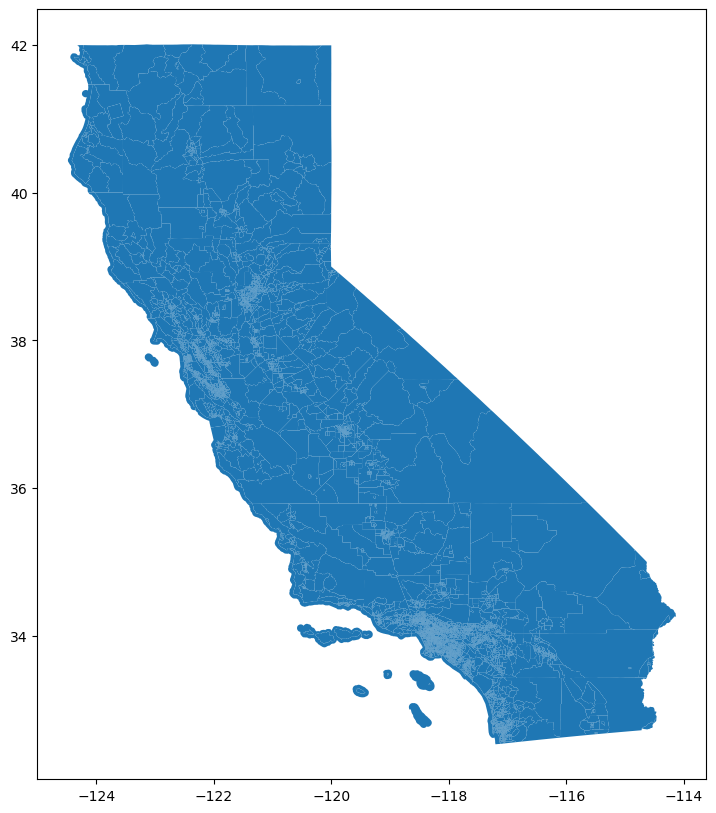

In [10]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax)
plt.show()

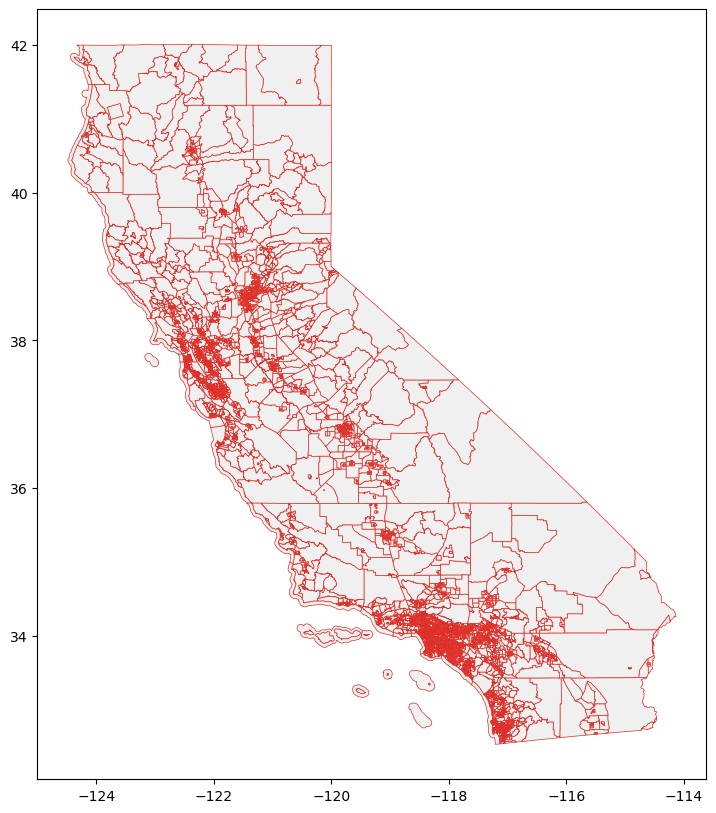

In [11]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, facecolor='#f0f0f0', edgecolor='#de2d26', linewidth=0.5)

plt.show()

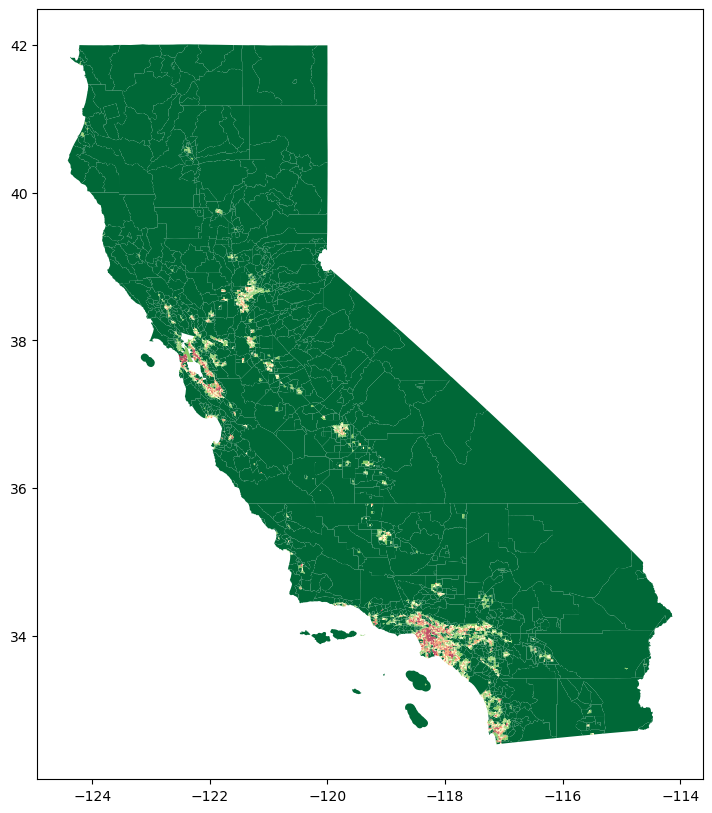

In [12]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='quantiles')
plt.show()

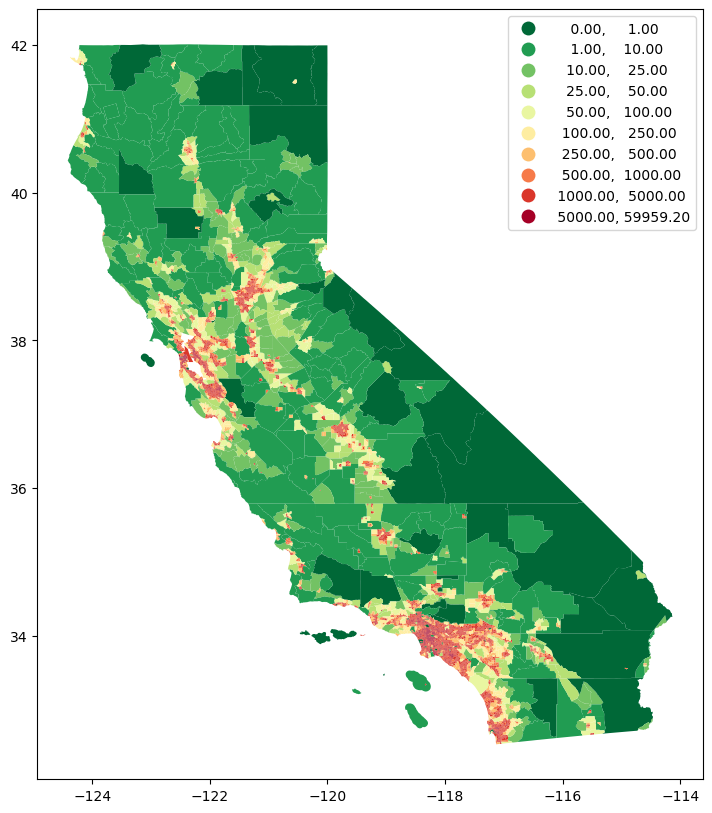

In [13]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)

classification_kwds={
  'bins': [1,10,25,50,100, 250, 500, 1000, 5000]
}
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=classification_kwds, legend=True)

plt.show()

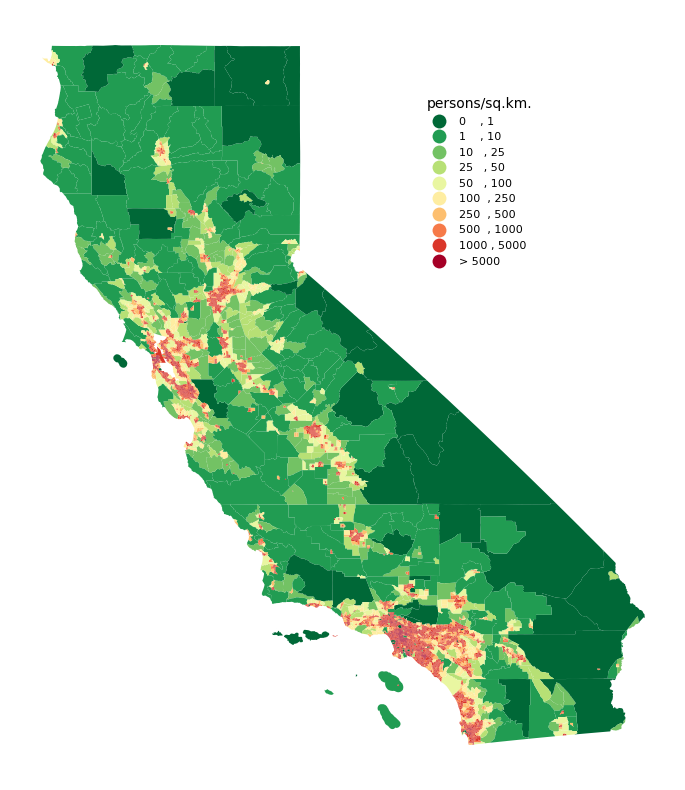

In [14]:
legend_kwds= {
  'loc': 'upper right',
  'bbox_to_anchor': (0.8, 0.9),
  'fmt': '{:<5.0f}',
  'frameon': False,
  'fontsize': 8,
  'title': 'persons/sq.km.'
}
classification_kwds={
  'bins':[1,10,25,50,100, 250, 500, 1000, 5000]
}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=classification_kwds,
         legend=True, legend_kwds=legend_kwds)

ax.set_axis_off()

# Change the last entry in the legend to '>5000'
legend = ax.get_legend()
legend.texts[-1].set_text('> 5000')

plt.show()

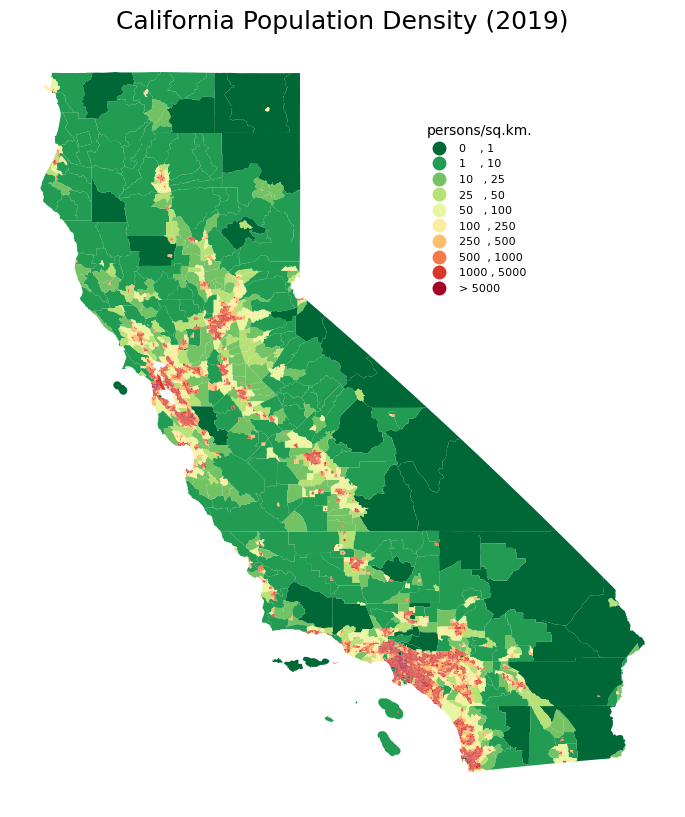

In [15]:
legend_kwds= {
  'loc': 'upper right',
  'bbox_to_anchor': (0.8, 0.9),
  'fmt': '{:<5.0f}',
  'frameon': False,
  'fontsize': 8,
  'title': 'persons/sq.km.'
}
classification_kwds={
  'bins':[1,10,25,50,100, 250, 500, 1000, 5000]
}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=classification_kwds,
         legend=True, legend_kwds=legend_kwds)

ax.set_axis_off()

# Change the last entry in the legend to '>5000'
legend = ax.get_legend()
legend.texts[-1].set_text('> 5000')

# Add a title
ax.set_title('California Population Density (2019)', size = 18)

output_path = os.path.join(output_folder, 'california_pop.png')
plt.savefig(output_path, dpi=300)

plt.show()

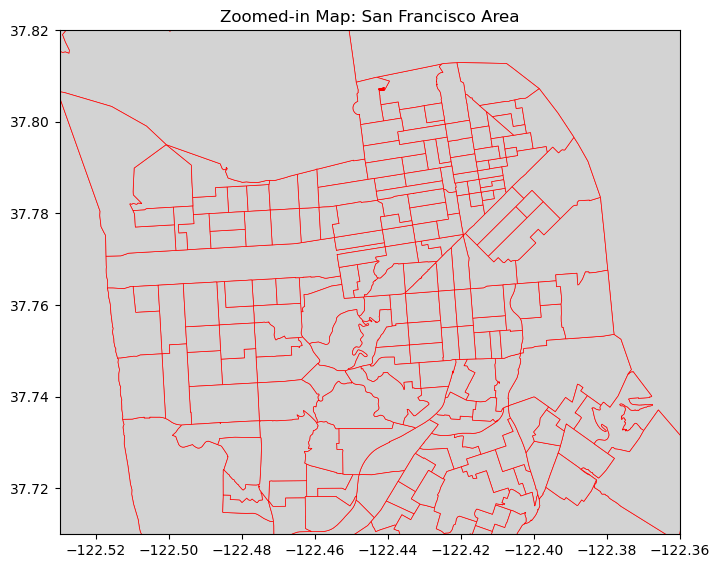

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Plot and set bounds around San Francisco
fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, color='lightgray', edgecolor='Red', linewidth=0.5)

# Set the zoom to SF bounding box
ax.set_xlim(-122.53, -122.36)
ax.set_ylim(37.71, 37.82)
ax.set_title("Zoomed-in Map: San Francisco Area")

plt.show()


In [18]:
import cartopy

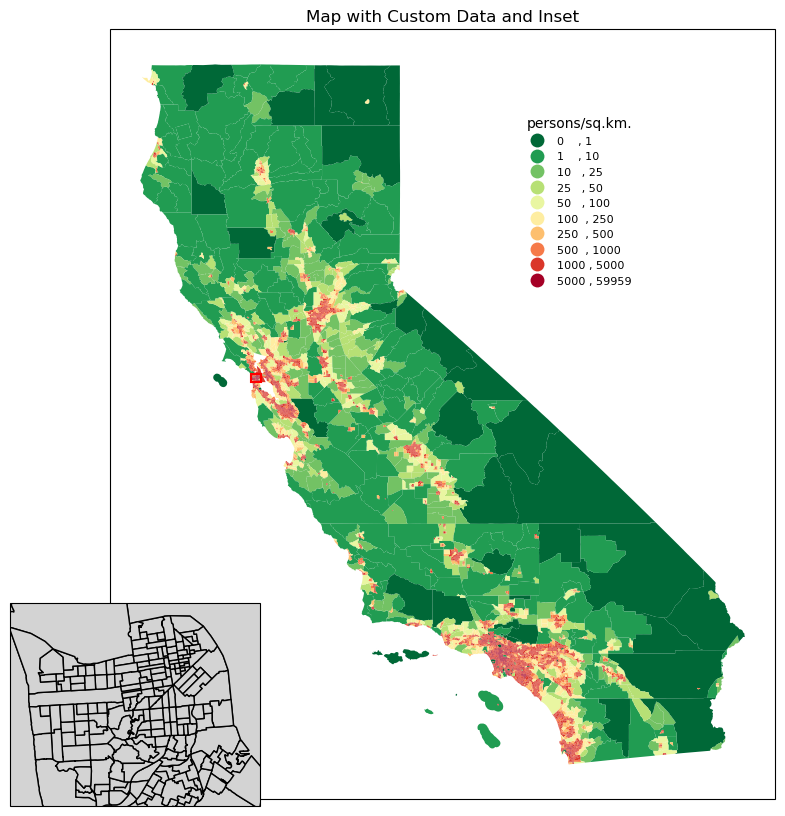

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Set up figure and main map
fig = plt.figure(figsize=(10, 10))
main_ax = plt.axes(projection=ccrs.PlateCarree())

# Main map extent (zoomed into your area)
# main_ax.set_extent([-122.53, -122.36, 37.71, 37.82])


# Plot your GeoDataFrame on the main map
# gdf.plot(ax=main_ax, facecolor='gray', edgecolor='black', markersize=5, transform=ccrs.PlateCarree())
gdf.plot(ax=main_ax, column='density', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=classification_kwds,
         legend=True, legend_kwds=legend_kwds,transform=ccrs.PlateCarree())

# Add title
main_ax.set_title("Map with Custom Data and Inset")

# # Create inset axes
inset_ax.set_extent([-122.53, -122.36, 37.71, 37.82])
inset_ax = plt.axes([0.08, 0.08, 0.25, 0.25], projection=ccrs.PlateCarree())
# inset_ax.set_extent([-130, -60, 20, 55])  # USA extent
gdf.plot(ax=inset_ax, facecolor='lightgray', edgecolor='black', markersize=5, transform=ccrs.PlateCarree())
# Set the zoom to SF bounding box
inset_ax.set_xlim(-122.53, -122.36)
inset_ax.set_ylim(37.71, 37.82)



# Draw rectangle showing main map extent on inset
from matplotlib.patches import Rectangle
inset_box = Rectangle(
    (-122.53, 37.71),
    0.17,  # lon width
    0.11,  # lat height
    edgecolor='red',
    facecolor='none',
    linewidth=1.5,
    transform=ccrs.PlateCarree()
)
main_ax.add_patch(inset_box)

plt.savefig("map_with_custom_data_and_inset.png", dpi=300)
plt.show()
